# **Introduction to Statistics IV**

Sebelumnya, kita telah mengetahui bahwa statistika adalah studi terkait pengumpulan, analisis dan
interpretasi data. Saat ini, manusia menghasilkan dan mengumpulkan lebih banyak data daripada sebelumnya. Setiap kali kita mengirim pesan teks, melakukan pembelian online, atau memposting foto di media sosial, kita menghasilkan data baru. Seiring bertambahnya jumlah data, kebutuhan akan menganalisis dan menafsirkan hal tersebut pun semakin meningkat. Ini adalah alasan utama mengapa statistika dan pekerjaan berbasis data sangatlah penting. Dengan demikian bidang analisis data berkembang hampir sama cepatnya seperti data itu sendiri. 

Profesional di bidang data menggunakan statistika untuk menganalisis data dalam bisnis, kedokteran, sains, teknik, pemerintah, dan banyak lagi. Profesional di bidang data menggunakan kekuatan metode statistika untuk mengidentifikasi pola yang bermakna dan mencari hubungan dalam data, menganalisis dan mengukur ketidakpastian, menghasilkan wawasan dari data, membuat prediksi yang tepat tentang masa depan, dan menyelesaikan masalah yang kompleks. 

Meskipun kita belum pernah mempelajari statistika, kita mungkin menggunakan statistika setiap hari. Misalnya, kita memulai hari dengan memeriksa cuaca secara online, di mana kita mempelajari bahwa
terdapat perkiraan kemungkinan hujan sebesar 70 persen atau kemungkinan salju sebesar 50 persen. Mungkin kita berkunjung ke situs web olahraga untuk mempelajari rata-rata pukulan pemain baseball atau rata-rata skor pemain basket favorit kita. Di aplikasi berita, kita mungkin menemukan jajak pendapat pemilu yang melaporkan angka margin of error sebesar tiga persen  dan mencatat bahwa survei online digunakan untuk mengumpulkan data. Atau mungkin kita adalah orang tua, dan saat kita membawa anak kita pada pemeriksaan rutin, kita mengetahui bahwa tinggi dan berat badan anak kita berada dalam persentil tertentu. Ketika kita meminta informasi lebih lanjut, dokter menunjukkan kepada kita
median tinggi dan berat badan untuk semua anak yang seumuran. Skenario ini mencakup konsep statistik yang akan kita pelajari lebih lanjut.

___

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import statsmodels.api as sm
import scipy.stats as stats

## **1. Hypothesis Testing for Proportion**

Di materi sebelumnya telah kita pelajari uji hipotesis pada data numerik. Lalu pertanyaan selanjutnya bagaimana kita menguji hipotesis pada data kategorikal?

Uji hipotesis untuk proporsi ini digunakan untuk menguji hipotesis data kategorikal seperti voting ‘Ya’ atau ‘Tidak’, keputusan ‘Beli’ atau ‘Tidak Beli’, ‘Berlangganan’ atau ‘Tidak berlangganan’, dan contoh lainnya.

Berikut ini jenis uji hipotesis untuk proporsi.
- Pertama, Z-test untuk proporsi populasi tunggal.
- Kedua, Z-test untuk proporsi dua populasi. 
- Terakhir, Chi-Squared Test untuk proporsi pada dua variabel kategorikal independen.

In [3]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### `a. One Sample Z-test`

Z-Test jenis ini digunakan untuk menguji dugaan atau hipotesis apakah proporsi dari suatu kelompok A sama dengan asumsi proporsi teoritis yang diinginkan.

Dalam kasus ini kita hendak menguji apakah proporsi buku fiksi adalah 50%. 

Kita nyatakan terlebih dahulu null hypothesis dan alternative hypothesis.

- `H0`: $\text{Proporsi}_\text{Buku Fiction}$ = 0.5
- `H1`: $\text{Proporsi}_\text{Buku Fiction}$ != 0.5

Kemudian kita pilih significance level.
- Significance level ($\alpha$) = 0.05

Selanjutnya kita hitung p-value.

In [14]:
# banyaknya buku fiksi
n_fiction = len(df[df['Genre']=='Fiction'])
n_fiction

# banyaknya buku
n_all = len(df)
n_all

550

In [17]:
from statsmodels.stats.proportion import proportions_ztest

stat, pvalue = proportions_ztest(
    count = n_fiction,          # jumlah buku bergenre fiksi
    nobs = n_all,               # jumlah seluruh buku
    value = 0.5                 # proporsi dari populasi / proporsi teoritis yang ingin diuji
)

pvalue

0.0026186572865008824

Terakhir kita tarik kesimpulan yaitu:

In [18]:
alpha = 0.05

if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi buku bergenre fiksi TIDAK SAMA dengan 0.5.
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= {alpha}. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa proporsi buku bergenre fiksi TIDAK SAMA dengan 0.5.
    ''')


    pvalue = 0.00262. pvalue <= 0.05. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa proporsi buku bergenre fiksi TIDAK SAMA dengan 0.5.
    


### `b. Two Sample Z-test`

Uji hipotesis ini digunakan untuk membandingkan proporsi dari 2 kelompok yang berbeda.

Dalam hal ini kita hendak mencontohkan pada kasus A/B testing.

Sebuah e-commerce membuat design UI baru. Kemudian dilakukan pengujian dengan 1000 user diberi design lama (control group) dan 1000 user diberi design baru (treatment group). Adapun hasil pengujiannya adalah sebagai berikut:

In [19]:
# buat data dummy
np.random.seed(0)

visitor_data_before = np.random.binomial(1, 0.5, 1000)
visitor_data_after = np.random.binomial(1, 0.7, 1000)

visitor_data_before = np.where(visitor_data_before ==1, 'buying', 'no buying')
visitor_data_after = np.where(visitor_data_after ==1, 'buying', 'no buying')

df_old = pd.DataFrame({'layout':'old layout', 'conversion': visitor_data_before})
df_new = pd.DataFrame({'layout':'new layout', 'conversion': visitor_data_after})
df_all = pd.concat([df_old, df_new], axis=0, ignore_index=True)
df_all.sample(5)

,layout,conversion
1267,new layout,buying
237,old layout,no buying
1601,new layout,buying
640,old layout,buying
577,old layout,buying


Kita dapat membuat ringkasan tabel menggunakan `pivot_table` untuk melihat total conversion pada masing-masing layout.

In [28]:
df_pivot  = df_all.pivot_table(
    index = 'layout',
    columns = 'conversion',
    values = 'conversion',
    aggfunc = len
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['total'] = df_pivot.sum(axis=0)
df_pivot

conversion,buying,no buying,total
layout,,,
new layout,664,336,1000
old layout,483,517,1000
total,1147,853,2000


Kita nyatakan terlebih dahulu null hypothesis dan alternative hypothesis.

- `H0`: $\text{transaksi kelompok design layout baru sama dengan kelompok layout lama}$
- `H1`: $\text{transaksi kelompok design layout baru lebih besar dari kelompok layout lama}$

Kemudian kita pilih significance level.
- Significance level ($\alpha$) = 0.05

Selanjutnya kita hitung p-value.

In [33]:
n_buying_new = df_pivot.loc['new layout', 'buying']
n_buying_new

664

In [34]:
n_buying_old = df_pivot.loc['old layout', 'buying']
n_buying_old

483

In [37]:
n_all_new = df_pivot.loc['new layout', 'total']
n_all_new

1000

In [38]:
n_all_old = df_pivot.loc['old layout', 'total']
n_all_old

1000

In [41]:
stat, pvalue = proportions_ztest(
    count = [n_buying_new, n_buying_old],           # banyaknya kejadian sukses/buying pada masing-masing layout
    nobs = [n_all_new, n_all_old],                  # banyaknya data pada masing-masing layout
    alternative = 'larger'                          # one tail lebih besar
)

pvalue

1.3789563948761732e-16

Sehingga kesimpulannya

In [42]:
alpha = 0.05

if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi yang membeli pada kelompok design layout yang baru
    LEBIH BESAR dari proporsi yang membeli pada kelompok design layout yang lama
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= {alpha}. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa proporsi yang membeli pada kelompok design layout yang baru
    LEBIH BESAR dari proporsi yang membeli pada kelompok design layout yang lama
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa proporsi yang membeli pada kelompok design layout yang baru
    LEBIH BESAR dari proporsi yang membeli pada kelompok design layout yang lama
    


### `c. Chi-Square Test`

Uji hipotesis ini digunakan untuk enmguji independency/keterkaitan antara 2 categorical variable.

Di bawah ini adalah crosstab dari 2 kolom Gender dan Fruit. 

In [43]:
# membuat dataframe baru
df_fruit = pd.DataFrame(
    data= [[207,282,241], [234,242,232]],
    columns= ['Banana', 'Mango', 'Pinaple'],
    index = ['Male', 'Female']
)

df_fruit

,Banana,Mango,Pinaple
Male,207,282,241
Female,234,242,232


Kita akan menguji apakah Gender terkait dengan pilihan buah yang akan dibeli.

Kita nyatakan terlebih dahulu null hypothesis dan alternative hypothesis.

- `H0`: $\text{Gender dan Fruit tidak terkait/independent (proporsinya sama)}$
- `H1`: $\text{Gender dan Fruit terkait/dependent (proporsinya berbeda signifikan)}$

Untuk mendapatkan nilai pvalue, kita harus mendapatkan terlebih dahulu nilai **dof, exprected_freq,** dan **chi_square**

**Dof** atau **degree of freedom** didapat menggunakan rumus

$$dof = \text{(jumlah baris-1)}\text{ x }\text{(jumlah kolom-1)}$$ 

In [50]:
n_baris = len(df_fruit)
n_kolom = len(df_fruit.columns)

# menghitung degree of freedom
dof = (n_baris-1) * (n_kolom-1)
dof

2

Adapun **expected_freq** dihitung dengan cara mengalikan total pada tiap baris dengan total pada tiap kolom dan membaginya dengan total keseluruhan.



In [55]:
df_fruit_total = df_fruit.copy()
df_fruit_total['Total'] = df_fruit_total.sum(axis=1)
df_fruit_total.loc['Total'] = df_fruit_total.sum(axis=0)
df_fruit_total

,Banana,Mango,Pinaple,Total
Male,207,282,241,730
Female,234,242,232,708
Total,441,524,473,1438


In [61]:
# Cara 1:
df_expected_freq = df_fruit_total.copy()

df_expected_freq.loc['Male', 'Banana'] = df_fruit_total.loc['Male', 'Total'] * df_fruit_total.loc['Total', 'Banana'] / df_fruit_total.loc['Total', 'Total']
df_expected_freq.loc['Male', 'Mango'] = df_fruit_total.loc['Male', 'Total'] * df_fruit_total.loc['Total', 'Mango'] / df_fruit_total.loc['Total', 'Total']
df_expected_freq.loc['Male', 'Pinaple'] = df_fruit_total.loc['Male', 'Total'] * df_fruit_total.loc['Total', 'Pinaple'] / df_fruit_total.loc['Total', 'Total']

df_expected_freq.loc['Female', 'Banana'] = df_fruit_total.loc['Female', 'Total'] * df_fruit_total.loc['Total', 'Banana'] / df_fruit_total.loc['Total', 'Total']
df_expected_freq.loc['Female', 'Mango'] = df_fruit_total.loc['Female', 'Total'] * df_fruit_total.loc['Total', 'Mango'] / df_fruit_total.loc['Total', 'Total']
df_expected_freq.loc['Female', 'Pinaple'] = df_fruit_total.loc['Female', 'Total'] * df_fruit_total.loc['Total', 'Pinaple'] / df_fruit_total.loc['Total', 'Total']

df_expected_freq

,Banana,Mango,Pinaple,Total
Male,223.873435,266.008345,240.11822,730
Female,217.126565,257.991655,232.88178,708
Total,441.000000,524.000000,473.00000,1438


In [67]:
# Cara 2

df_expected_freq = df_fruit_total.copy()

for indeks in df_fruit_total.index[:-1]:
    for kolom in df_fruit_total.columns[:-1]:
        df_expected_freq.loc[indeks, kolom] = df_fruit_total.loc[indeks, 'Total'] * df_fruit_total.loc['Total', kolom] / df_fruit_total.loc['Total', 'Total']

df_expected_freq

,Banana,Mango,Pinaple,Total
Male,223.873435,266.008345,240.11822,730
Female,217.126565,257.991655,232.88178,708
Total,441.000000,524.000000,473.00000,1438


Selanjutnya kita dapat menghitung nilai **chi_square** dengan menggunakan formula:

$$ \chi^2 = \frac{\sum_{i=1}^n (O_i - E_i)^2}{E_i} $$

dimana :
- O = nilai pengamatan
- E = nilai ekspektasi

In [71]:
chi_square = 0

for indeks in df_fruit_total.index[:-1]:
    for kolom in df_fruit_total.columns[:-1]:
        chi_square += (df_fruit_total.loc[indeks, kolom] - df_expected_freq.loc[indeks, kolom])**2 / df_expected_freq.loc[indeks, kolom]

chi_square

4.542228269825232

Untuk menghitung **pvalue**, kita bisa menggunakan tabel atau rumus yang disediakan python.

In [72]:
pvalue = 1 - stats.chi2.cdf(chi_square, dof)
pvalue

0.10319714047309392

Jika digambarkan dalam grafik maka hasilnya sebagai berikut:

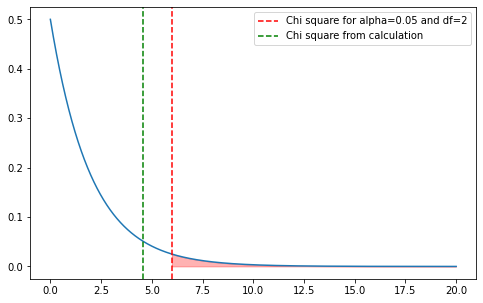

In [73]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 2 degrees of freedom
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(x, stats.chi2.pdf(x, df=dof))

line_x, line_y = ax.lines[0].get_data()

# calculate chi square for alpha 0.05 and degree of freedom 2
rejection = stats.chi2.ppf(1 - alpha, dof)

ax.axvline(
    x=rejection,
    color="red",
    linestyle='--',
    label='Chi square for alpha=0.05 and df=2'
)

ax.fill_between(
    line_x,
    line_y,
    where=(line_x >rejection),
    color='red',
    alpha=0.3
)

# plot chi square from calculation
ax.axvline(
    x=chi_square,
    color="green",
    linestyle='--',
    label='Chi square from calculation'
)

plt.legend()
plt.show()

Dari grafik tersebut kita bisa melihat bahwa untuk significance level di angka 0.05 dan degree of freedom sebesar 2, nilai $\chi^2$-nya adalah sebesar 5.991. Kita akan menolak `H0` apabila nilai $\chi^2$ dari perhitungan di atas 5.991. Namun kita dapat melihat bahwa nilai $\chi^2$ dari perhitungan yaitu 4.54 berada di sebelah kiri dari area penolakan. Maka kita gagal menolak `H0`.

Keseluruhan perhitungan dan interpretasi di atas bisa dilakukan secara cepat dengan cara berikut:

In [74]:
df_fruit

,Banana,Mango,Pinaple
Male,207,282,241
Female,234,242,232


In [76]:
from scipy.stats import chi2_contingency

stat, pvalue, dof, expected_freq = chi2_contingency(df_fruit)
pvalue

0.1031971404730939

In [77]:
alpha = 0.05

if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Gender dan Fruit ada keterkaitan (dependent)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= {alpha}. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa antara Gender dan Fruit ada keterkaitan (dependent)
    ''')


    pvalue = 0.10320. pvalue > 0.05. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Gender dan Fruit ada keterkaitan (dependent)
    


## **2. Correlation**

Korelasi adalah salah satu jenis hubungan yang tidak berimplikasi pada sebab akibat. Korelasi tidak membedakan antara variabel respons dan variabel eksplanatori. Misalnya, sebuah studi telah membuktikan intensitas berlibur berkorelasi dengan pendapatan seseorang. Tidak bisa diartikan semakin sering berlibur akan semakin meningkatkan pendapatan seseorang.

Korelasi hanya mengukur seberapa `kuat` suatu hubungan dan `arah` dari hubungan tersebut. 

Korelasi memiliki arah:
- Korelasi **positif** berarti arah hubungannya linear, seperti hubungan luas area persawahan dengan total produksi padi.
- Korelasi **negatif** berarti arah hubungannya terbalik, seperti hubungan total populasi tikus di sawah dengan total produksi padi.

Nilai korelasi berkisar antara -1 dan 1. Berikut ini acuan untuk menilai hasil uji korelasi:

| Value of Correlation Coeffficient | Relationship Interpretation |
| --- | --- |
| 0.000 - 0.199 | Very Weak |
| 0.200 - 0.399 | Weak |
| 0.400 - 0.599 | Moderate |
| 0.600 - 0.799 | Strong |
| 0.800 - 1.000 | Very Strong |

Secara umum arah dan kekuatan dari suatu hubungan dapat divisualisasikan sebagai berikut:

![](https://cdn1.byjus.com/wp-content/uploads/2021/03/Correlation.png)


Terdapat 2 macam korelasi yang akan kita pelajari yaitu:
- Pearson
- Spearman

### `a. Pearson`


Jika kita memiliki dua vektor dengan panjang yang sama, $x$ dan $y$, di mana setiap elemen dari $x$ dipasangkan dengan elemen yang sesuai dari $y$, kovariansi memberikan ukuran seberapa terkaitnya variabel satu dengan yang lain:

​$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$
 
Di mana:

- $\text{cov}(x, y)$ adalah kovariansi antara vektor $x$ dan $y$.
- $n$ adalah jumlah elemen dalam vektor.
- $x_i$ dan $y_i$ adalah elemen ke-$i$ dari vektor $x$ dan $y$ masing-masing.
- $\bar{x}$ dan $\bar{y}$ adalah rata-rata dari vektor $x$ dan $y$, secara berturut-turut.

Salah satu kelemahan kovariansi adalah bahwa kovariansi menyamarkan skala relatif dua variabel dengan ukuran keterkaitan variabel tersebut. Korelasi dibangun dari kovariansi dan mengatasi kelemahan ini melalui penskalaan ulang, sehingga mengukur keterkaitan (linear) secara eksklusif. Korelasi jauh lebih umum karena perbedaan ini.

Koefisien korelasi (dikembangkan oleh Karl Pearson pada abad ke-20 meskipun sudah dikenal pada abad ke-19) sering kali dilambangkan dengan $r$ atau $\rho$ dan didefinisikan oleh:

​$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$
 
Di mana:

- $\rho_{x,y}$ adalah koefisien korelasi antara variabel $x$ dan $y$.
- $\text{cov}(x,y)$ adalah kovariansi antara variabel $x$ dan $y$.
- $\sigma_x$ dan $\sigma_y$ adalah simpangan baku dari variabel $x$ dan $y$, masing-masing.

Korelasi Pearson merupakan salah satu ukuran korelasi yang digunakan untuk mengukur kekuatan dan arah hubungan linear dari 2 variabel. Korelasi pearson biasa diterapkan pada data yang diasumsikan **terdistribusi normal** serta **hubungannya linear** (garis lurus).

Kita akan coba hitung korelasi Pearson dari panjang daun kelopak (`sepal_length`) dan panjang mahkota bunga (`petal_length`) pada dataset iris di seaborn.

In [80]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pertama-tama, kita coba tampilkan terlebih dahulu scatterplot dari `sepal_length` dan `petal_length` untuk melihat gambaran terkait hubungan antara keduanya.

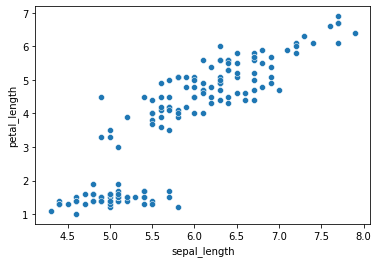

In [83]:
x = iris['sepal_length']
y = iris['petal_length']

sns.scatterplot(data=iris, x = x, y = y)
plt.show()

Selanjutnya kita akan menghitung terlebih dahulu covariance antara `sepal_length` dan `petal_length`

In [95]:
# menghitung rata-rata
xbar = x.mean()
ybar = y.mean()

# banyaknya data
n = len(iris)
n

# menghitung hasil kali
products = []

for i in range(n):
    products.append((x[i] - xbar)*(y[i] - ybar))

covariance = np.sum(products) / n
covariance

1.26582

Selanjutnya kita hitung $\rho$ dengan rumus Pearson di atas:

In [98]:
r = covariance / (np.std(x) * np.std(y))
r

0.8717537758865831

Kita telah mencapai titik ini dalam Probabilitas. Sekarang, mengenai bagaimana menentukan p-value, kita pertama-tama menghitung t-statistik.

$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

In [99]:
t = r * np.sqrt((n-2)/(1-r**2))
t

21.646019345759765

Selanjutnya kita bisa menghitung pvalue

In [100]:
pvalue = 2 * stats.t.cdf(-abs(t), n-2)
pvalue

1.0386674194498124e-47

Semua langkah di atas dapat dihitung dengan 1 baris kode menggunakan metode `pearsonr()`: 

In [102]:
from scipy.stats import pearsonr

stat, pvalue = pearsonr(x, y)
pvalue

1.0386674194497525e-47

Interpretasi dari korelasi tersebut (r=0.872)

- (+) Hubungannya positif, semakin tinggi `sepal_length`, maka semakin tinggi `petal_length`
- Nilainya 0.871, hubungannya sangat kuat.

Kita juga bisa menghitung sekaligus korelasi dari setiap kolom numerikal pada dataset iris dengan cara berikut

In [106]:
iris.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### `b. Spearman`

Korelasi spearman merupakan salah satu ukuran korelasi yang digunakan untuk mengukur kekuatan dan arah hubungan non-linear dari 2 variabel.

Korelasi spearman dapat digunakan untuk mengukur korelasi dari data:

- **Non-Parametric** : tidak ada asumsi distribusi datanya
- Hubungannya non-linear (tidak membentuk garis lurus) dan **monotonic**
- Dapat digunakan untuk kolom kategorikal ordinal

Kita akan coba hitung juga korelasi Spearman dari panjang daun kelopak (`sepal_length`) dan panjang mahkota bunga (`petal_length`) menggunakan metode `spearmanr()`.

In [108]:
from scipy.stats import spearmanr

r, pvalue = spearmanr(x, y)
r

0.881898126434986

Atau kita juga bisa menggunakan `.corr(method='spearman')`

In [109]:
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


Atau kita bisa juga hitung manual dengan menggunakan rumus berikut:

​$$ \rho = 1 - \frac{6\sum_{i=1}^n \text{diff}^2}{n(n^2-1)} $$

In [119]:
spearman_table = iris[['sepal_length', 'petal_length']].copy()
spearman_table['sepal_length_rank'] = spearman_table['sepal_length'].rank()
spearman_table['petal_length_rank'] = spearman_table['petal_length'].rank()
spearman_table['diff'] = spearman_table['sepal_length_rank'] - spearman_table['petal_length_rank']
spearman_table['diff^2'] = spearman_table['diff'] ** 2
spearman_table

,sepal_length,petal_length,sepal_length_rank,petal_length_rank,diff,diff^2
0,5.1,1.4,37.0,18.0,19.0,361.00
1,4.9,1.4,19.5,18.0,1.5,2.25
2,4.7,1.3,10.5,8.0,2.5,6.25
3,4.6,1.5,7.5,31.0,-23.5,552.25
4,5.0,1.4,27.5,18.0,9.5,90.25
...,...,...,...,...,...,...
145,6.7,5.2,126.5,117.5,9.0,81.00
146,6.3,5.0,104.0,106.5,-2.5,6.25
147,6.5,5.2,118.0,117.5,0.5,0.25
148,6.2,5.4,97.5,121.5,-24.0,576.00


In [122]:
ruas_atas = 6 * spearman_table['diff^2'].sum()
ruas_atas

397791.0

In [123]:
ruas_bawah = n * (n**2 - 1)
ruas_bawah

3374850

In [124]:
r_spearman = 1 - (ruas_atas/ruas_bawah)
r_spearman

0.8821307613671718

### `Simpson Paradox`

Merupakan sebuah fenomena dalam statistika, dimana tren dari beberapa kelompok data terbalik dari tren gabungan  kelompok data keseluruhan.

Misalnya, ada sebuah studi yang mengkaji hubungan Tingkat Pendidikan dan Kejahatan. Perhatikan tabel berikut ini.

In [125]:
df_crime  = pd.DataFrame({
    'education' : [70, 75, 80, 85, 55, 58, 60, 65],
    'crime' : [140, 120, 110, 105, 50, 40, 30, 25],
    'location' : ['urban', 'urban', 'urban', 'urban', 'rural', 'rural', 'rural', 'rural']
})

df_crime

,education,crime,location
0,70,140,urban
1,75,120,urban
2,80,110,urban
3,85,105,urban
4,55,50,rural
5,58,40,rural
6,60,30,rural
7,65,25,rural


Jika hanya menganalisis tingkat pendidikan dan tingkat kriminal saja, kita bisa salah asumsi dimana semakin tinggi tingkat pendidikan, semakin banyak juga jumlah kejahatan.

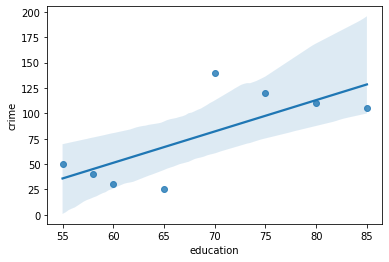

In [127]:
sns.regplot(data=df_crime, x='education', y='crime')
plt.show()

Bandingkan dengan analisis yang memisahkan yang tinggal desa dan kota. Hasilnya akan berbeda.

In [131]:
df_crime[df_crime['location']=='urban']

,education,crime,location
0,70,140,urban
1,75,120,urban
2,80,110,urban
3,85,105,urban


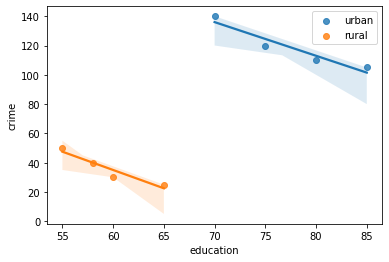

In [134]:
sns.regplot(data=df_crime[df_crime['location']=='urban'], x='education', y='crime', label='urban')
sns.regplot(data=df_crime[df_crime['location']=='rural'], x='education', y='crime', label='rural')
plt.legend()
plt.show()

Jika dipisahkan seperti grafik di atas, baik di kota maupun desa, semakin tinggi tingkat pendidikannya, tingkat kejahatannya juga semakin turun.

### `Correlation vs Causation`

Korelasi tidak menyiratkan kausalitas secara sendiri. Misalnya, panjang sepal dan panjang petal berkorelasi sangat tinggi, tetapi ini tidak berarti bahwa panjang sepal menyebabkan panjang petal atau sebaliknya.

Ada banyak hal tentang kausalitas dan saya merekomendasikan buku Judea Pearl's [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/), teks teknis klasik tentang topik ini, jika Anda ingin menjelajahinya secara mendalam. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) adalah alternatif yang luar biasa bagi pembaca umum dari penulis yang sama.

Secara singkat, ada tiga kriteria yang diperlukan untuk menyimpulkan hubungan kausal:

1. **Covariation**: Dua variabel bervariasi bersama (kriteria ini dipenuhi oleh panjang sepal dan petal)
2. **Temporal precedence**: Variabel yang terpengaruh harus bervariasi setelah variabel penyebabnya bervariasi.
3. **Elimination of extraneous variables**: Kita harus yakin tidak ada variabel ketiga yang menyebabkan variasi. Ini bisa sulit untuk data yang kita peroleh hanya melalui observasi, tetapi lebih mudah ketika kita dapat mengendalikan variabel penyebab, misalnya, dengan uji coba kontrol teracak (idealnya double-blind).

## **3. Summary**

Secara umum, keseluruhan uji yang kita lakukan dapat diringkas pada tabel berikut:

| | Parametric | Non-parametric |
| --- | --- | --- |
| Assumed distribution | Normal | Any |
| Assumed variance | Homogeneous | Any |
| Data set relationships | Independent | Any |
| Usual central measure | Mean | Median |
| Benefits | can draw more conclusions | Simplicity; Less affected by outliers |
| Tests | | |
| Correlation test | Pearson | Spearman |
| Independent measures, 2 groups | Independent-measures t-test | Mann-Whitney test |
| Independent measures, >2 groups | One-way, independent-measures ANOVA | Kruskall-Wallis test |
| Repeated measures, 2 conditions | Matched-pair t-test | Wilcoxon test |
| Repeated measures, >2 conditions | One-way, repeated-measures ANOVA | Friedman's test |

Adapun secara visualisasi dapat dilihat sebagai berikut:

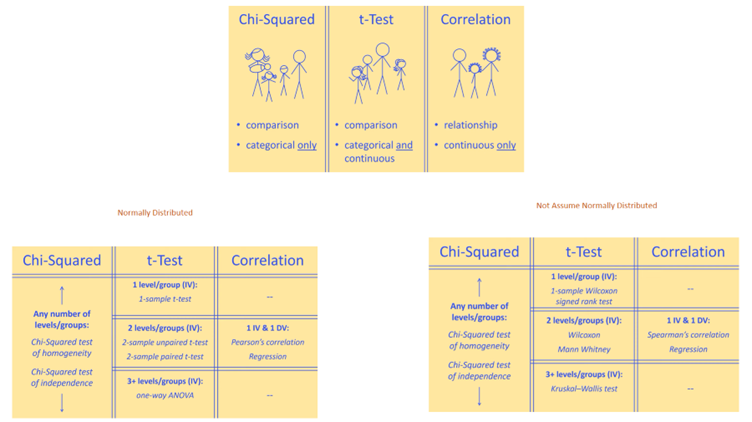



